In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Basic plotting with matplotlib's pyplot. For much much much more information feel free to peruse their [documentation](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).  

### Single Plot

The basic plot command takes in two vectors of the same size $X = \left[ \begin{array}{cccc} x_0 & x_1 & \cdots & x_{n-1}  \end{array}  \right].T$ and $Y = \left[ \begin{array}{cccc} y_0 & y_1 & \cdots & y_{n-1}  \end{array}  \right].T$ and plots the points $(x_0,y_0), (x_1,y_1),...,(x_{n-1},y_{n-1})$ connecting successive points with a straight line. Try it below

In [2]:
data = np.array([[0,1.23],[0.5,0.76],[1,-0.31],[1.5,1.05]])

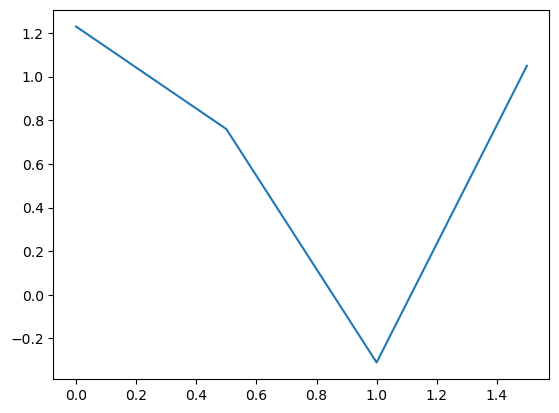

In [3]:
plt.plot(data[:,0:1],data[:,1:]); #Notice the semicolon.  It suppresses an unecessary output cell. 

To approximate smooth curves (like a cubic function...) we plot lots of points:  
$t$=np.linspace(a,b,num=k) returns a vector $t\in \mathbb{R}^k$ with $t(i) = a + \frac{(b-a)i}{k-1},$ for $i=0,1,...,k-1.$ I.e. it distributes $k$ points at equal intervals between $a$ and $b$. For our purposes $k=100$ will suffice.

__Example 2:__ Let's plot $y=x^2$ on the interval $[-1,1]$

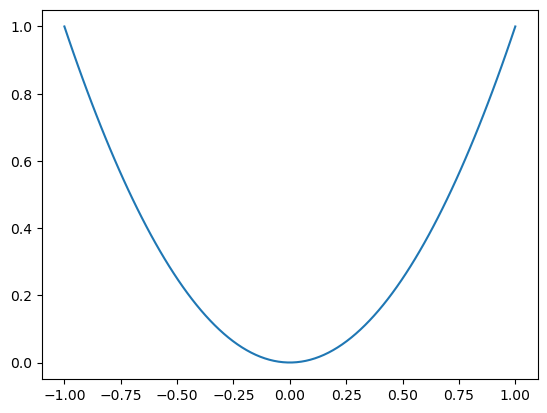

In [4]:
t = np.linspace(-1,1,num=100) 
plt.plot(t,t**2);

__Example 3:__ Plot the cubic $t^3-1.68t^2+0.854t-0.132$ on the interval $[0,1]$.  
But let's do it in a linear algebra way that will easily scale to many cubics.

In [5]:
t = np.linspace(0,1,num=100) #You should check the shape of this
coeff = np.array([[-0.132,0.854,-1.68,1]]).T #You should check the shape of this
generic_cubic = np.array([1+0*t,t,t**2,t**3]).T #You should check the shape of this
y_val = generic_cubic @ coeff #You should check the shape of this

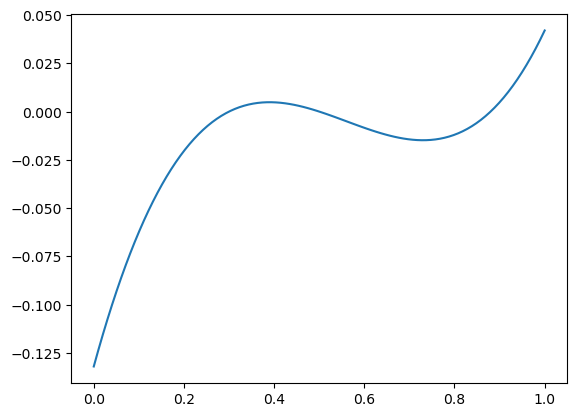

In [6]:
plt.plot(t,y_val);

__Example 4:__ Plot a curve that is not the graph of a function.

In [7]:
t = np.linspace(-1,1,num=100)
x = t**2
y = t**3

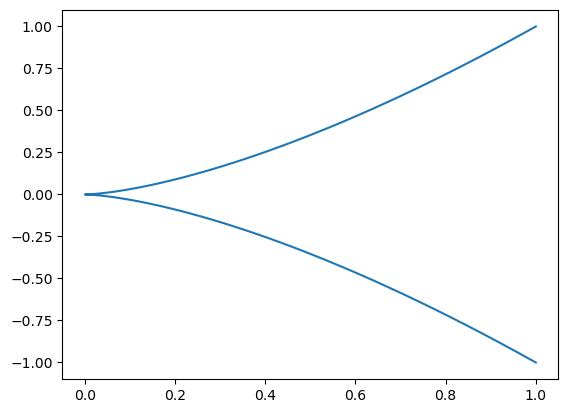

In [8]:
plt.plot(x,y);

### Multiple Plots

plt.plot easily handles multiple plots. Suppose that $X$ and $Y$ are both $n\times k$ matrices.  Then plt.plot(X,Y) will make k plots--It will plot plt.plot(X[:,i:i+1], Y[:,i:i+1]) for i=0,...,k-1.

__Example 5:__ Put some splines together

I input a 6x2 matrix into coeff (the function you wrote for your splines assignment). X is the first 5 rows of the output and Y is the bottom 5 rows of the output.

In [9]:
X = np.array([[ 0.15120968,  0.4156795 ,  0.        , -0.14551821],
       [ 0.42137097, -0.02087514, -0.43655464,  0.33041364],
       [ 0.29435484,  0.09725652,  0.55468629, -0.26686217],
       [ 0.67943548,  0.4060426 , -0.24590022, -0.06538432],
       [ 0.77419355, -0.28191079, -0.44205317,  0.14735106]])

Y = np.array([[ 0.12770563, -0.012609  ,  0.        ,  0.02884277],
       [ 0.14393939,  0.0739193 ,  0.0865283 ,  0.08576451],
       [ 0.39015152,  0.50426945,  0.34382185, -0.45848091],
       [ 0.7797619 , -0.18352959, -1.03162089,  0.68484745],
       [ 0.24945887, -0.19222902,  1.02292146, -0.34097382]])

In [10]:
X_cubic = generic_cubic@X.T #You should check the shape of this
Y_cubic = generic_cubic@Y.T #You should check the shape of this

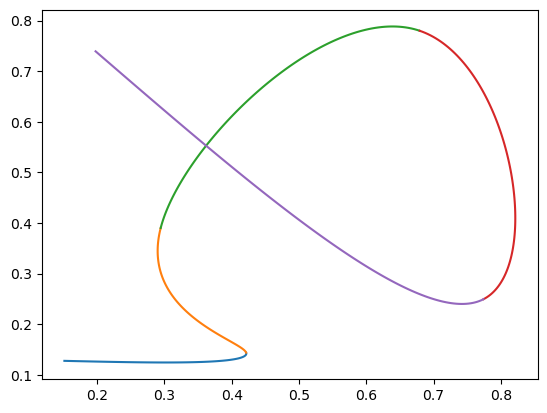

In [11]:
plt.plot(X_cubic,Y_cubic);

I left all of the colors different so you could see there are 5 separate plots glued together.  Now that you've seen it we can force it all to be one color (say red) as follows. ([The color legend](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def))

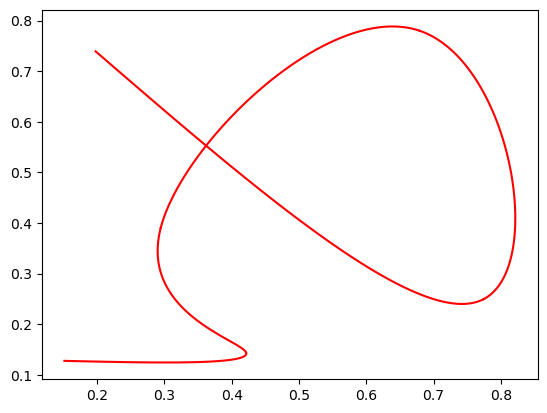

In [12]:
plt.plot(X_cubic,Y_cubic,'r'); #'b'=blue, 'g'=green, 'y'=yellow, 'k'=black, ...

# Exercises

Fix two vectors $v,w\in \mathbb{R}^2$  
Let's call the following curve the quadratic interpolation from $v$ to $w$:  
$(1-t)v + t^2v$ where  $0\leq t\leq 1$

1. Plot the quadratic interpolation from $\left[\begin{array}{cc} 0 & -1  \end{array}\right].T$ to $\left[\begin{array}{cc} 1 & 0  \end{array}\right].T$ See Example 3 and 4.

You should make 2 arrays X1,Y1 both of shape 100x1 and finish with plt.plot(X1,Y1).  
Work out what X1 and Y1 should look with paper and pencil before you type anything.

2. Plot 4 curves together on one plot:  
   A. quadratic interpolation from $\left[\begin{array}{cc} 0 & -1  \end{array}\right].T$ to $\left[\begin{array}{cc} 1 & 0      \end{array}\right].T$  
   B. quadratic interpolation from $\left[\begin{array}{cc} 1 & 0  \end{array}\right].T$ to $\left[\begin{array}{cc} 0 & 1  \end{array}\right].T$  
   C. quadratic interpolation from $\left[\begin{array}{cc} 0 & 1  \end{array}\right].T$ to $\left[\begin{array}{cc} -1 & 0  \end{array}\right].T$  
   D. quadratic interpolation from $\left[\begin{array}{cc} -1 & 0  \end{array}\right].T$ to $\left[\begin{array}{cc} 0 & -1  \end{array}\right].T$
   

You should make 2 matrices X2 and Y2 both of shape 100x4 and finish with one plot command plt.plot(X2,Y2).  See Example 5

Work out what X2 and Y2 should look like with paper and pencil before you start typing

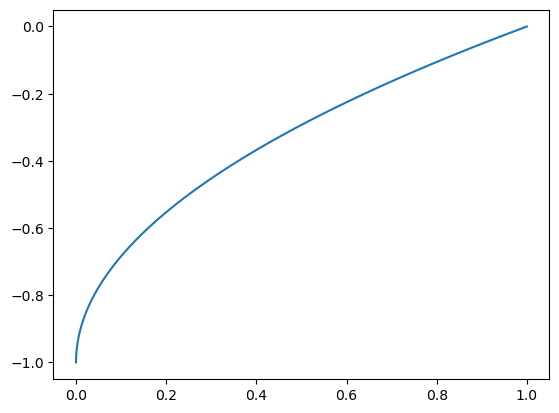

In [13]:
t = np.linspace(0, 1, num=100)
generic_quad = np.array([1+0*t, t, t**2]).T 

# ---------------------------
# (1)
# ---------------------------
v = np.array([0.0, -1.0])
w = np.array([1.0,  0.0])

C = np.vstack([v, -v, w])
P = generic_quad @ C
X1 = P[:, 0:1]
Y1 = P[:, 1:2]

plt.plot(X1, Y1);

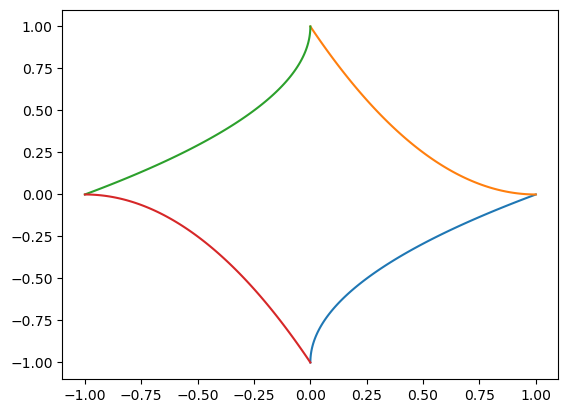

In [14]:
# ---------------------------
# (2)
# ---------------------------
v_x  = np.array([ 0,  1,  0, -1])
v_y  = np.array([-1,  0,  1,  0])
w_x  = np.array([ 1,  0, -1,  0])
w_y  = np.array([ 0,  1,  0, -1])

X = np.vstack([v_x, -v_x,  w_x])
Y = np.vstack([v_y, -v_y,  w_y])

X2 = generic_quad @ X
Y2 = generic_quad @ Y

plt.plot(X2, Y2);